# Preprocessing Task

- I left the output of each cell so you can check your solution and know what the expected output should look like.
- If your code is correct but produces slightly different results from mine, that’s totally fine. This rarely happens, but if it does, it will be minor and will be taken into consideration.

# Importing


In [21]:
# Import Needed Libraries
import pandas as pd
import numpy as np

In [22]:
# Read data and show first 5 rows
df = pd.read_csv(r"D:\CS-IEEE-ZSB-26-AI\Task2\house_prices.csv")
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Data Shape ?
df.shape

(1460, 81)

In [24]:
# Data Info (Data Type of Each column) ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [25]:
# what the number of Numurical and Categorical Columns ?
print('#Cat_Col:',df.select_dtypes(include=object).shape[1])
print('#Num_Col:' ,df.select_dtypes(include=['Int64', 'float64']).shape[1])

#Cat_Col: 43
#Num_Col: 38


- <b> features to be removed ---> 80%  is nan 
- <b> features to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [26]:
# write function calculate the number of null values in each Feature (column) and Feature has 80% or higher null values drop Feature
# if null count is > 3% and < 80%  fill it by mean 
# if null count is < 3% remove this row that contain this null value 
def handle_nulls(df):
    df = df.copy()

    null_percentage = df.isnull().mean()
    f_to_be_removed = list(null_percentage[null_percentage >= 0.80].index)
    df = df.loc[:, null_percentage < 0.80]

    null_percentage = df.isnull().mean()
    f_to_be_filled = list(null_percentage[(null_percentage >= 0.03) & (null_percentage < 0.80)].index)
    for col in f_to_be_filled:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean())
        else:
            df[col].fillna(df[col].mode()[0])

    obs_to_be_removed = list(null_percentage[null_percentage < 0.03].index)
    df.dropna(subset=obs_to_be_removed, inplace=True)

    return df, f_to_be_removed, f_to_be_filled, obs_to_be_removed

df_clean, f_removed, f_filled, obs_removed = handle_nulls(df)

print("#>>>f_to_be_removed:", f_removed)
print("#>>>f_to_be_filled:", f_filled)
print("#>>>obs_to_be_removed:", obs_removed)

#>>>f_to_be_removed: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
#>>>f_to_be_filled: ['LotFrontage', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
#>>>obs_to_be_removed: ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDr

# Redundant Handling

### Automated function for both categorical and numircal data

In [27]:
# write function to calculate the most redundant value in each column how many it repeated ?
def most_redundant_counts(df):
    return df.apply(lambda col: col.value_counts().iloc[0]).to_dict()

result = most_redundant_counts(df)
print(result)

{'Id': 1, 'MSSubClass': 536, 'MSZoning': 1151, 'LotFrontage': 143, 'LotArea': 25, 'Street': 1454, 'Alley': 50, 'LotShape': 925, 'LandContour': 1311, 'Utilities': 1459, 'LotConfig': 1052, 'LandSlope': 1382, 'Neighborhood': 225, 'Condition1': 1260, 'Condition2': 1445, 'BldgType': 1220, 'HouseStyle': 726, 'OverallQual': 397, 'OverallCond': 821, 'YearBuilt': 67, 'YearRemodAdd': 178, 'RoofStyle': 1141, 'RoofMatl': 1434, 'Exterior1st': 515, 'Exterior2nd': 504, 'MasVnrType': 445, 'MasVnrArea': 861, 'ExterQual': 906, 'ExterCond': 1282, 'Foundation': 647, 'BsmtQual': 649, 'BsmtCond': 1311, 'BsmtExposure': 953, 'BsmtFinType1': 430, 'BsmtFinSF1': 467, 'BsmtFinType2': 1256, 'BsmtFinSF2': 1293, 'BsmtUnfSF': 118, 'TotalBsmtSF': 37, 'Heating': 1428, 'HeatingQC': 741, 'CentralAir': 1365, 'Electrical': 1334, '1stFlrSF': 25, '2ndFlrSF': 829, 'LowQualFinSF': 1434, 'GrLivArea': 22, 'BsmtFullBath': 856, 'BsmtHalfBath': 1378, 'FullBath': 768, 'HalfBath': 913, 'BedroomAbvGr': 804, 'KitchenAbvGr': 1392, 'Kitc

In [28]:
# if it repeated more than or equal 80% from data rows count remove the feature 
# Data row count = data.shape[0]
total_rows = df.shape[0]
redundant_counts = most_redundant_counts(df)
features_to_remove = [col for col, count in redundant_counts.items() if count / total_rows >= 0.80]
df.drop(columns=features_to_remove, inplace=True)

print(len(features_to_remove))
print(features_to_remove)

29
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


# Handling correlation between features

In [29]:
#calculate the correlation matrix  (note the correlation matrix just only for numirical features )
numeric_df = df.select_dtypes(include='number')

crr = numeric_df.corr()
crr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

In [30]:
def drop_high_corr_simple(df, threshold=0.7):
    to_drop = set()

    for i in range(len(crr.columns)):
        for j in range(i):
            if crr.iloc[i, j] > threshold:
                colname = crr.columns[i]
                to_drop.add(colname)

    df_new = df.drop(columns=to_drop)

    return df_new, list(to_drop)

df, to_drop = drop_high_corr_simple(df)
print(to_drop)

['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd']


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [31]:
# Write function to remove Outliers that above Upper band or below lower band for each column 
def remove_outliers(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    return df
df_clean = remove_outliers(df)

# Skewness Handling
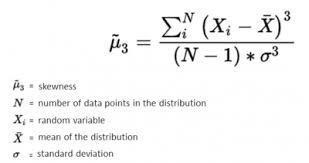


In [32]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
def feature_skewness(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    N = df.shape[0]
    
    skew_dict = {}
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        skew = ((df[col] - mean)**3).sum() / ((N - 1) * std**3)
        skew_dict[col] = skew
        
    return pd.Series(skew_dict, name="Skewness")

skew_values = feature_skewness(df)
print(skew_values)

Id               0.000000
MSSubClass       1.405728
LotFrontage      1.776531
LotArea         12.190965
OverallQual      0.216647
OverallCond      0.692118
YearBuilt       -0.612621
YearRemodAdd    -0.502872
MasVnrArea       2.650793
BsmtFinSF1       1.683194
BsmtUnfSF        0.919008
TotalBsmtSF      1.522167
2ndFlrSF         0.811916
GrLivArea        1.364688
BsmtFullBath     0.595250
FullBath         0.036511
HalfBath         0.674972
BedroomAbvGr     0.211500
Fireplaces       0.648675
GarageCars      -0.342080
WoodDeckSF       1.539264
OpenPorchSF      2.361103
MoSold           0.211763
YrSold           0.096137
Name: Skewness, dtype: float64


# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [33]:
# Features that have absolute skewness > 1 do for it Log tranformation 
def log_transform_skewed(df, threshold=1):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    transformed_features = []

    for col in num_cols:
        if abs(df[col].skew()) > threshold:
            df[col] = np.log1p(df[col])
            transformed_features.append(col)

    return df, transformed_features


df, log_features = log_transform_skewed(df)
print("Features is log_Transformed :")
for f in log_features:
    print(f)

Features is log_Transformed :
MSSubClass
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
TotalBsmtSF
GrLivArea
WoodDeckSF
OpenPorchSF


# Transform categorical features 

In [34]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Write code to transform each ordinal and nominal columns 
# سيرشك الجميل بقي وشوف كل واحد بيطلع ايه وازاي هتلم الداتا بتاعتك معلش هتعبك معانا يا جميل 
le = LabelEncoder()
for col in ordinal_cats:
    df[col] = le.fit_transform(df[col].astype(str))

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_df = pd.DataFrame(ohe.fit_transform(df[nominal_cats]), columns=ohe.get_feature_names_out(nominal_cats), index=df.index)
df = pd.concat([df.drop(columns=nominal_cats), encoded_df], axis=1)


print(df.dtypes)

Id                   int64
MSSubClass         float64
LotFrontage        float64
LotArea            float64
Alley               object
                    ...   
FireplaceQu_Fa     float64
FireplaceQu_Gd     float64
FireplaceQu_Po     float64
FireplaceQu_TA     float64
FireplaceQu_nan    float64
Length: 136, dtype: object


# Transform Numerical features 
> I want you apply only Min-Max Scaling for all numerical columns

In [36]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan
0,0.000000,0.483003,0.413268,0.366271,1.0,0.666667,0.500,0.949275,0.883333,0.716038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000685,0.000000,0.490307,0.391245,1.0,0.555556,0.875,0.753623,0.433333,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.483003,0.429990,0.422289,0.0,0.666667,0.500,0.934783,0.866667,0.690361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.551764,0.383633,0.390223,0.0,0.666667,0.500,0.311594,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.002742,0.483003,0.508439,0.468694,0.0,0.777778,0.500,0.927536,0.833333,0.794318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# print Your final data frame here 
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan
0,0.000000,0.483003,0.413268,0.366271,NaN,1.0,0.666667,0.500,0.949275,0.883333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000685,0.000000,0.490307,0.391245,NaN,1.0,0.555556,0.875,0.753623,0.433333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.483003,0.429990,0.422289,NaN,0.0,0.666667,0.500,0.934783,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.551764,0.383633,0.390223,NaN,0.0,0.666667,0.500,0.311594,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.002742,0.483003,0.508439,0.468694,NaN,0.0,0.777778,0.500,0.927536,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
